In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Standard Units

In [2]:
exams = Table.read_table('data/exams_fa18.csv')
exams.show(5)

Midterm,Final
91,88
89.5,84
78,71.5
87,88
72,72.5


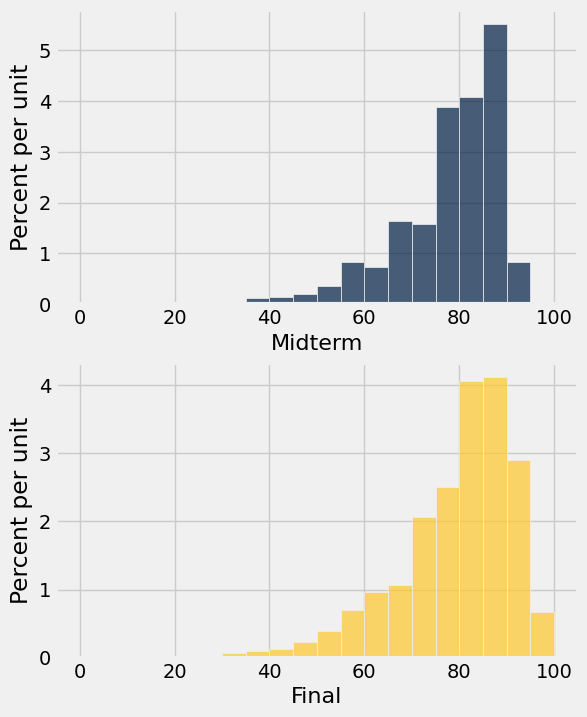

In [3]:
exams.hist(overlay=False, bins=np.arange(0,101,5))

In [4]:
def standard_units(x):
    """Convert array of values to standard units"""
    return (x - np.average(x)) / np.std(x)

In [5]:
midterm_su = standard_units(exams.column('Midterm'))
exams = exams.with_column('Midterm in Standard Units', midterm_su)

final_su = standard_units(exams.column('Final'))
exams = exams.with_column('Final in Standard Units', final_su)

exams.show(10)

Midterm,Final,Midterm in Standard Units,Final in Standard Units
91,88,1.16278,0.717241
89.5,84,1.03032,0.390935
78,71.5,0.0147889,-0.628768
87,88,0.809552,0.717241
72,72.5,-0.515053,-0.547191
71.5,61,-0.559206,-1.48532
82,92.5,0.368017,1.08433
84.5,87,0.588784,0.635664
85,92,0.632938,1.04355
78,71,0.0147889,-0.669556


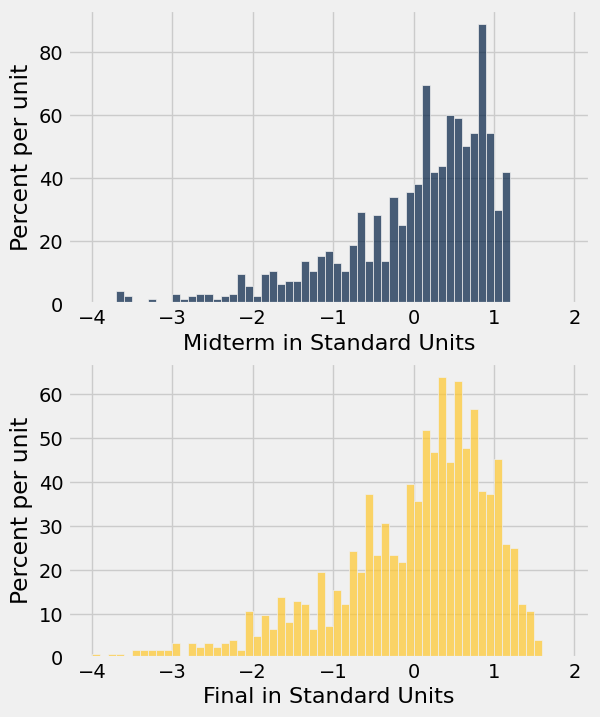

In [6]:
(exams
    .select('Midterm in Standard Units', 'Final in Standard Units')
    .hist(overlay=False, bins=np.arange(-4,2,0.1))
)

## The SD and Bell Shaped Curves

In [7]:
births = Table.read_table('data/baby.csv')

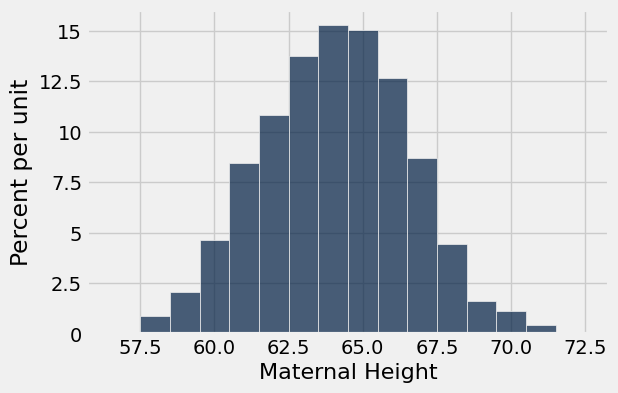

In [8]:
births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1))

In [9]:
heights = births.column('Maternal Height')
np.mean(heights), np.std(heights)

(64.049403747870528, 2.5250254409674375)

In [10]:
# 1 SD below & above the mean
np.mean(heights) - np.std(heights), np.mean(heights) + np.std(heights)

(61.524378306903088, 66.574429188837968)

--- 
back to slides

---

## The Standard Normal Curve

The standard normal curve and its first and second derivative
\begin{align}
\phi(z)= & \frac{1}{\sqrt{2\pi}} e^ {\frac{1}{2}z^2}\\
\frac{\delta{\phi}}{\delta{z}}  = & - \frac{1}{\sqrt{2\pi}} e^ {\frac{1}{2}z^2} x\\
\frac{\delta^2{\phi}}{\delta{z}^2}  = & \frac{1}{\sqrt{2\pi}} e^ {\frac{1}{2}z^2} (x^2-1)\\
\end{align}

In [11]:
# Create the functions and evaluate them 
def snc(x):
    return 1/(2*np.pi)**0.5 * np.e**(-0.5*x**2)

def snc_de1(x):
    return -1/(2*np.pi)**0.5 * np.e**(-0.5 * x**2) *x

def snc_de2(x):
    return 1/(2*np.pi)**0.5 * np.e**(-0.5 * x**2) * (x**2 - 1)

x = np.arange(-4,4,0.1)
y = snc(x)
y_p1 = snc_de1(x)
y_p2 = snc_de2(x)

In [12]:
births = births.with_column('SU', standard_units(heights))

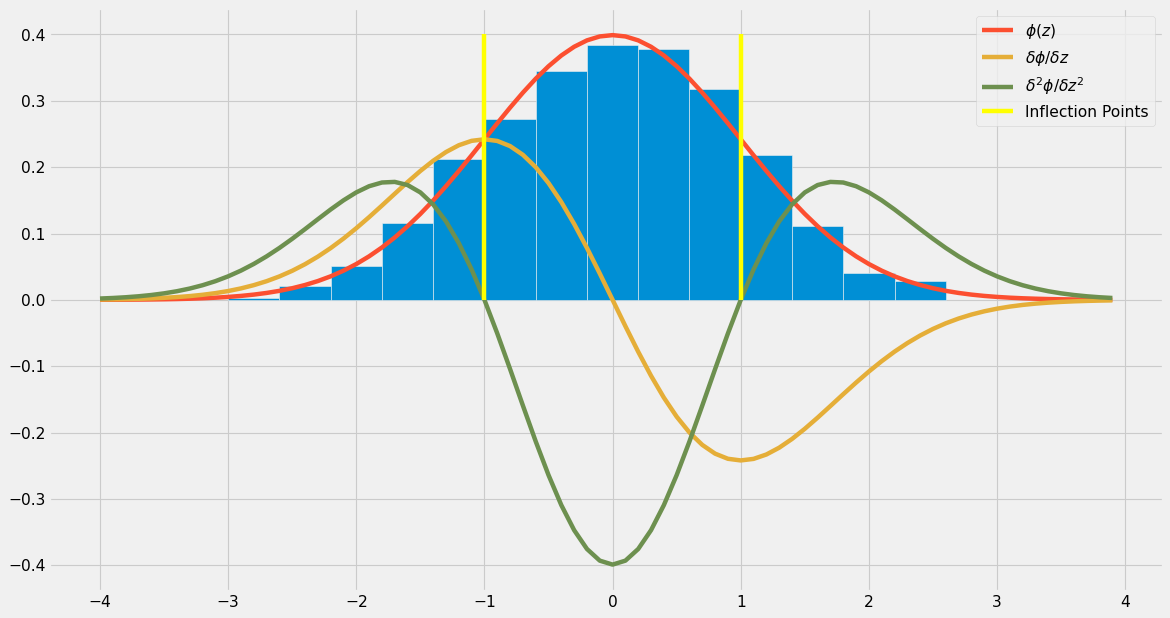

In [13]:
fig, ax = plots.subplots(figsize=(16,9), dpi=80)
ax.hist(standard_units(heights), bins=np.arange(-3, 3, 0.4), density=True)
ax.plot(x, y)
ax.plot(x, y_p1)
ax.plot(x, y_p2)

ax.vlines(-1, 0, 0.4, color='yellow', zorder=2)
ax.vlines(1, 0, 0.4, color='yellow', zorder=2)

ax.legend(['$\phi(z)$', 
           '$\delta{\phi}/\delta{z}$',
           '$\delta^2{\phi}/\delta{z}^2$', 
           'Inflection Points'])

fig.savefig('out.png')

---
back to slides

---

## Central Limit Theorem 

In [14]:
united = Table.read_table('data/united.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


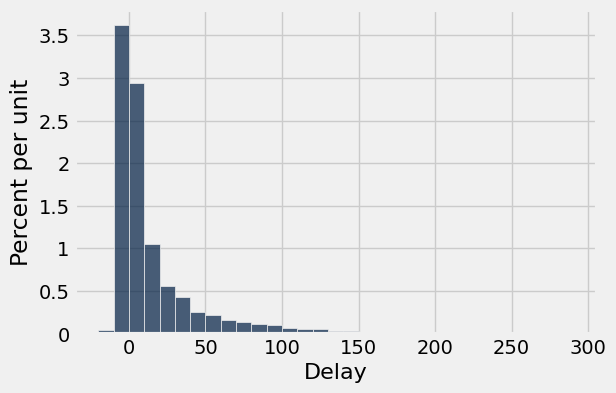

In [15]:
united_bins = np.arange(-20, 300, 10)
united.hist('Delay', bins=united_bins)

In [16]:
delays = united.column('Delay')
delay_median = np.median(delays)
delay_mean = np.mean(delays)
delay_sd = np.std(delays)
delay_mean, delay_sd, delay_median

(16.658155515370705, 39.480199851609314, 2.0)

In [17]:
percentile(50, delays)

2

In [18]:
delays.size

13825

In [19]:
def one_sample_mean(sample_size):
    """ 
    Takes a sample from the population of flights 
    and computes its mean
    """
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [20]:
one_sample_mean(100)

18.66

In [21]:
def ten_thousand_sample_means(sample_size):
    means = make_array()
    for i in np.arange(10_000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

(16.658155515370705,
 array([ 12.23,  23.43,  23.36, ...,  11.08,  15.38,  10.3 ]))

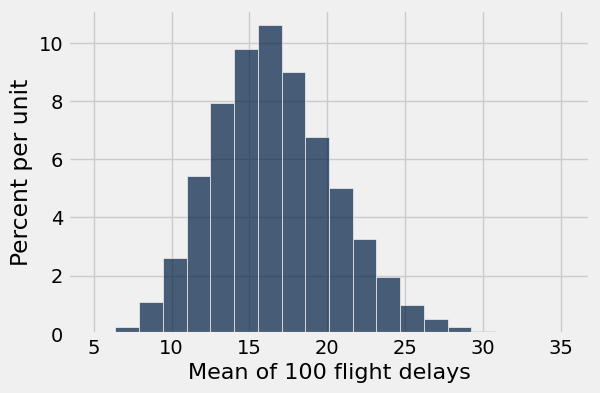

In [22]:
sample_means_100 = ten_thousand_sample_means(100)

Table().with_column('Mean of 100 flight delays', sample_means_100).hist(bins=20)

delay_mean, np.mean(sample_means_100)

## Now lets take 400

(16.658155515370705,
 array([ 17.8075,  19.0275,  14.7725, ...,  13.8675,  15.595 ,  18.19  ]))

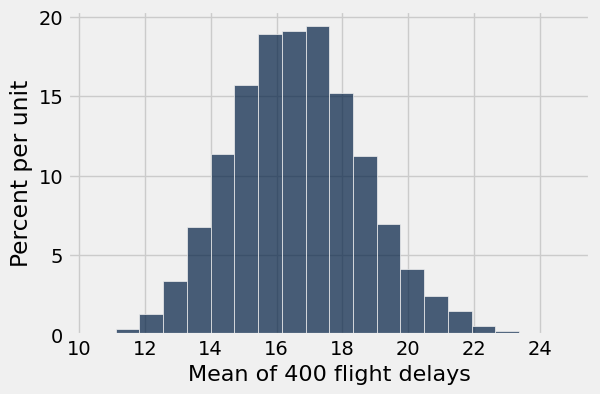

In [23]:
sample_means_400 = ten_thousand_sample_means(400)

Table().with_column('Mean of 400 flight delays', sample_means_400).hist(bins=20)

delay_mean, np.mean(sample_means_400)

Question: 
- What changed? How is this histogram different from the previous?
- hint: check x axis AND y-axis

In [24]:
np.mean(sample_means_400)

16.649973500000002

## Now lets do 900
what do we expect?

(16.658155515370705, 16.644708888888889)

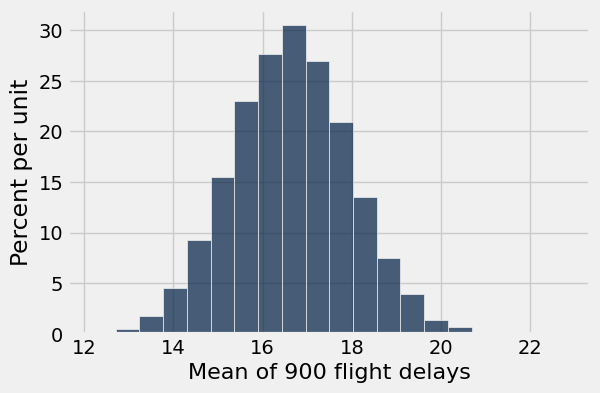

In [25]:
sample_means_900 = ten_thousand_sample_means(900)

Table().with_column(
    'Mean of 900 flight delays', sample_means_900).hist(bins=20)

delay_mean, np.mean(sample_means_900)

## ...  and 1600

(16.658155515370705, 16.662358187500001)

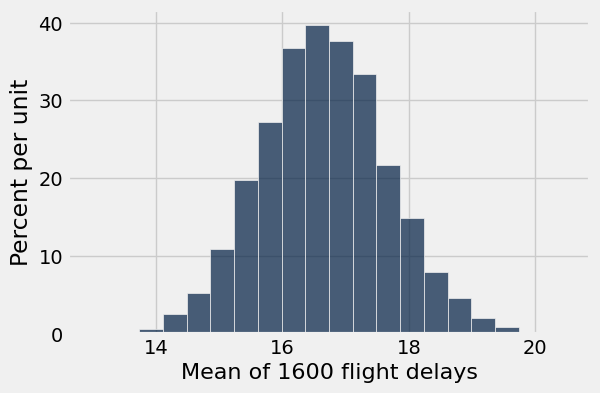

In [26]:
sample_means_1600 = ten_thousand_sample_means(1600)

Table().with_column('Mean of 1600 flight delays', sample_means_1600).hist(bins=20)

delay_mean, np.mean(sample_means_1600)

## Plot them all together

In [27]:
means_tbl = Table().with_columns(
    '100', sample_means_100,
    '400', sample_means_400,
    '900', sample_means_900,
    '1600', sample_means_1600,
)
means_tbl

100,400,900,1600
12.23,17.8075,16.0611,16.1638
23.43,19.0275,17.9356,16.3069
23.36,14.7725,17.0289,15.6375
24.47,14.765,18.3444,16.9594
14.07,15.54,17.6344,17.5437
14.02,15.43,16.3167,15.13
23.12,13.7575,14.8089,18.3625
17.35,17.13,16.1144,15.1687
16.55,14.835,15.9644,14.9275
18.16,21.355,14.9833,18.0344


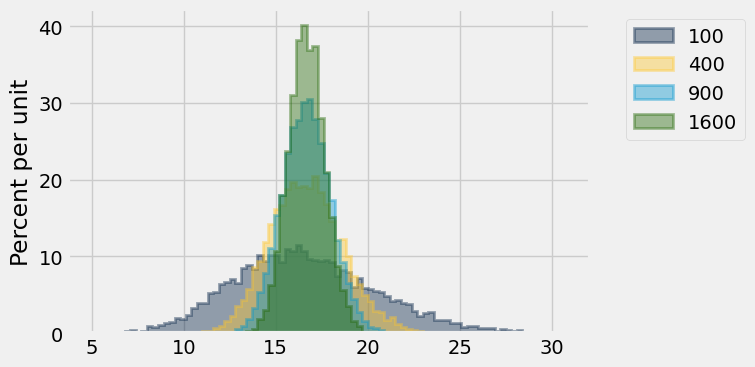

In [28]:
means_tbl.hist(bins = np.arange(5, 31, 0.3), alpha=0.4, histtype='step', linewidth=2, fill=True)

In [29]:
means =  make_array(np.mean(sample_means_100),
                    np.mean(sample_means_400),
                    np.mean(sample_means_900),
                    np.mean(sample_means_1600))

stds = make_array(np.std(sample_means_100),
                  np.std(sample_means_400),
                  np.std(sample_means_900),
                  np.std(sample_means_1600))

summary = Table().with_columns('sample size', make_array(100, 400, 900 ,1600),
                               'means', means,
                               'std', stds)                               
summary

sample size,means,std
100,16.6262,3.91343
400,16.65,1.98089
900,16.6447,1.31693
1600,16.6624,0.996211


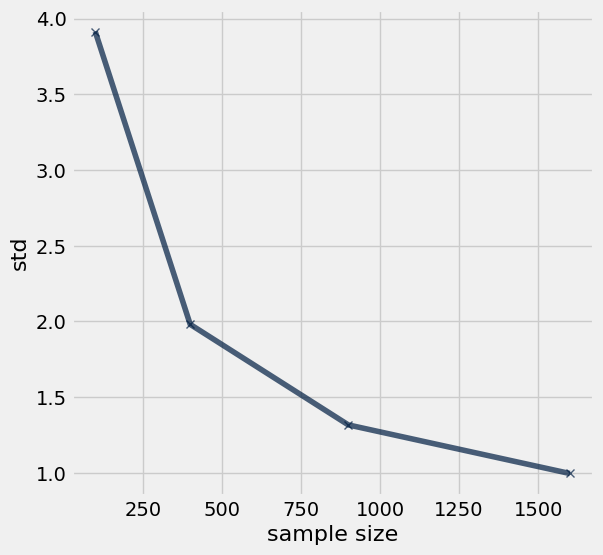

In [30]:
summary.plot('sample size', 'std', marker='x')

In [32]:
sample_size_scales = make_array(1, 4, 9, 16)
summary.with_columns('sample size scale', sample_size_scales,
                     'sqrt scale factor', 1/np.sqrt(sample_size_scales),
                     'std scale factor', stds / stds[0])

sample size,means,std,sample size scale,sqrt scale factor,std scale factor
100,16.6262,3.91343,1,1,1
400,16.65,1.98089,4,0.5,0.506179
900,16.6447,1.31693,9,0.333333,0.336516
1600,16.6624,0.996211,16,0.25,0.254562
